## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load Dataset


In [ ]:
booking = pd.read_csv("booking.csv")
# Make index start from 1 instead of 0 & drop the old index
booking.drop(["Booking_ID"], axis=1, inplace=True)
booking.index = booking.index + 1
print(booking.shape)
booking.head()

## Understanding the Dataset


### Data types information


In [ ]:
booking.info()

### Summary Statistics


In [ ]:
booking.describe()

### Check for unique values


In [ ]:
booking.nunique()

### Check if there is null values


In [ ]:
print(booking.isnull().sum().sort_values(ascending=False))

## Data Cleansing & Preprocessing


### Droping Outliers


In [ ]:
# Create box plots for every variable before droping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=booking, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(booking.shape)

In [ ]:
outliers_cols = ["lead time", "average price"]
for column in outliers_cols:
    if booking[column].dtype in ["int64", "float64"]:
        q1 = booking[column].quantile(0.25)
        q3 = booking[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        booking = booking[
            (booking[column] >= lower_bound) & (booking[column] <= upper_bound)
        ]

In [ ]:
# Create box plots for every variable after dropping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
booking_boxplot = sns.boxplot(data=booking, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(booking.shape)

## Encoding Categorical Variables


### Binarizing the target column

Canceled = 1 <br>
Not_Canceled = 0


In [ ]:
booking["booking status"] = booking["booking status"].replace("Canceled", 1)
booking["booking status"] = booking["booking status"].replace("Not_Canceled", 0)
booking.head()

#### Split the date to (day/month/year) & Drop the date in wrong format


In [ ]:
booking = booking[~booking["date of reservation"].str.contains("-")]
booking["date of reservation"] = pd.to_datetime(booking["date of reservation"])

booking["day"] = booking["date of reservation"].dt.day
booking["month"] = booking["date of reservation"].dt.month
booking["year"] = booking["date of reservation"].dt.year

# Drop the original datetime column
booking = booking.drop(columns=["date of reservation"])
booking.info()

### Round the float col to int


In [ ]:
booking["average price"] = booking["average price"].round().astype(int)

### Apply One Hot Encoding on Variables of datatype = "object"

True = 1 <br>
False = 0


In [ ]:
object_columns = booking.select_dtypes(include=["object"]).columns
booking = pd.get_dummies(booking, columns=object_columns)
booking = booking.replace({True: 1, False: 0})
booking.info()

In [ ]:
booking.head()

## Visualize the correlation between variables

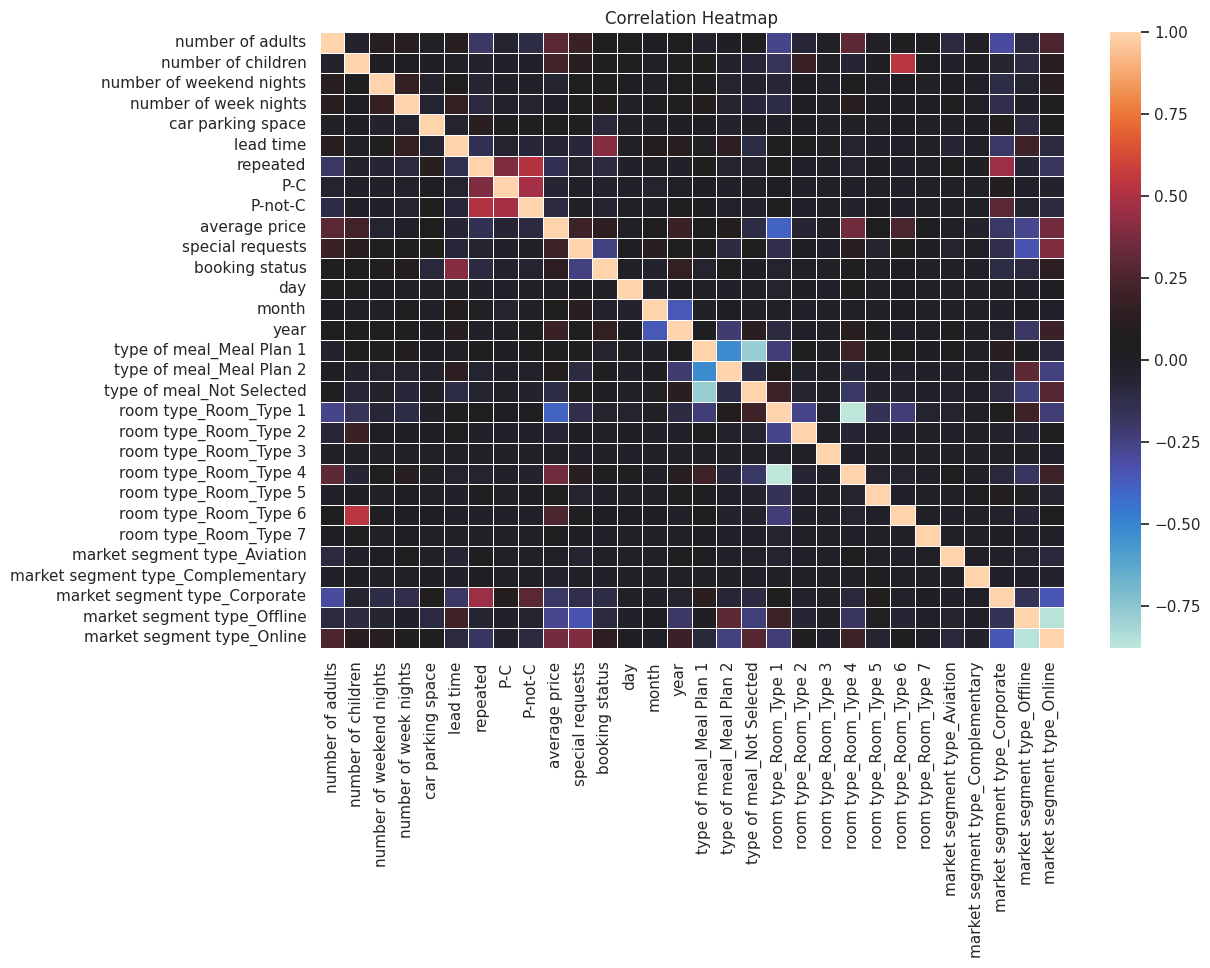

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(booking.corr(), cmap='icefire', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Feature Selection


In [41]:
features = booking.drop(["booking status"], axis=1)
target = booking["booking status"]

k_best = SelectKBest(score_func=f_classif, k=10)

X = k_best.fit_transform(features, target)
y = target

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

lead time: 6755.25
special requests: 2136.14
year: 952.07
market segment type_Online: 646.78
average price: 614.84
market segment type_Corporate: 414.32
repeated: 343.90
market segment type_Offline: 250.21
number of week nights: 248.88
car parking space: 216.60


## Split Data into Train & Test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.2, random_state=5
)